In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.metrics import f1_score

In [2]:
FILE = "fetal_health.csv"

OUTPUT_COL = 'fetal_health'
RELEVANT_INPUT_FEATURES = [
    'baseline value', 
    'accelerations', 
    'fetal_movement',
    'uterine_contractions', 
    'light_decelerations', 
    'severe_decelerations',
    'prolongued_decelerations', 
    'abnormal_short_term_variability',
    'mean_value_of_short_term_variability',
    'percentage_of_time_with_abnormal_long_term_variability',
    'mean_value_of_long_term_variability'
]

TEST_WITHHOLD_AMT = 0.25

**Load in data**

In [3]:
df = pd.read_csv(FILE)

In [4]:
df = df[RELEVANT_INPUT_FEATURES + [OUTPUT_COL]]

In [5]:
X = df.drop(OUTPUT_COL, axis=1)
Y = df[OUTPUT_COL]

**Test train split**

In [6]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=TEST_WITHHOLD_AMT, random_state=42)

In [7]:
clf = DecisionTreeClassifier(max_depth=5).fit(XTrain, YTrain)

**Raw accuracy score**

In [8]:
accuracy = clf.score(XTest, YTest)

In [9]:
accuracy

0.9342105263157895

**F1 Score** - for each feature

In [10]:
YTest_Predicted = clf.predict(XTest)

In [11]:
f1 = f1_score(YTest, YTest_Predicted, average=None)

In [12]:
f1

array([0.95867769, 0.81081081, 0.89855072])

**Visualize tree**

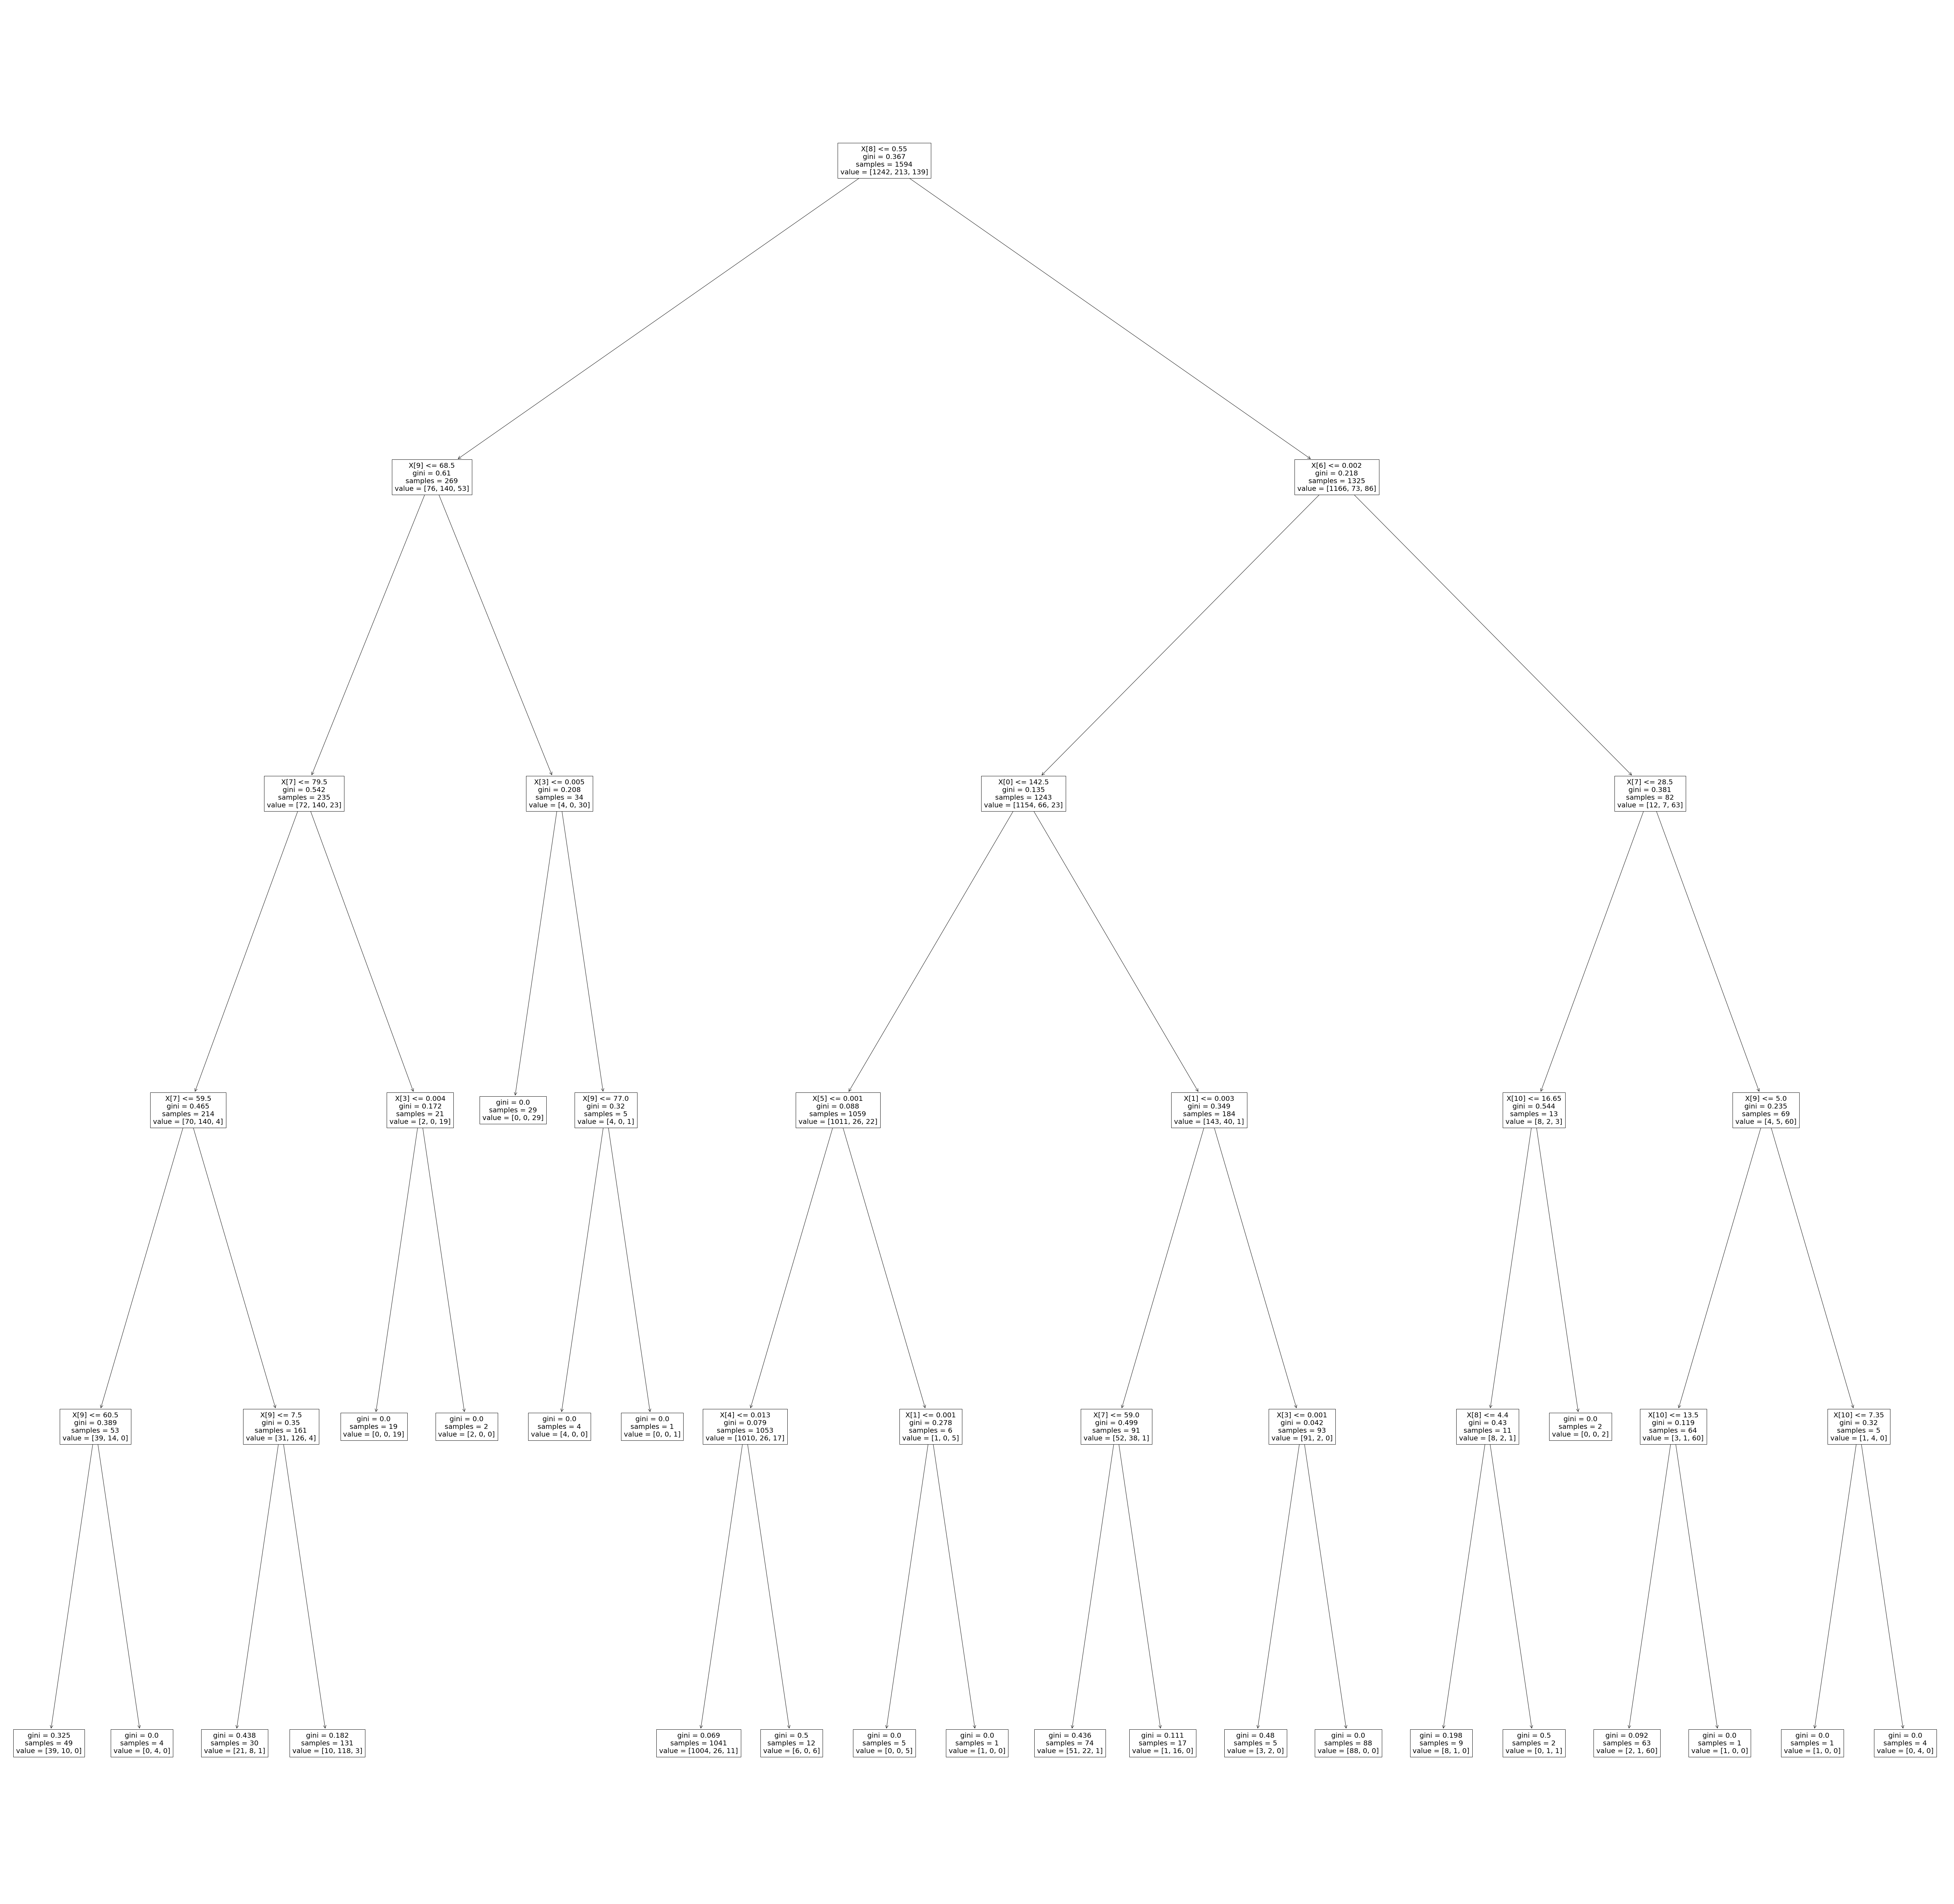

In [13]:
fig = plt.figure(figsize=(100, 100))
plot_tree(clf)
plt.show()

**Make some visualizations**

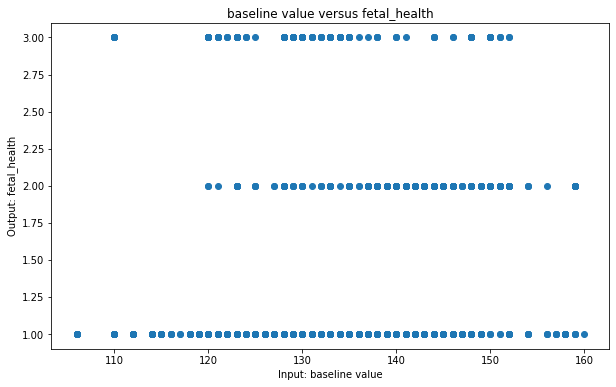

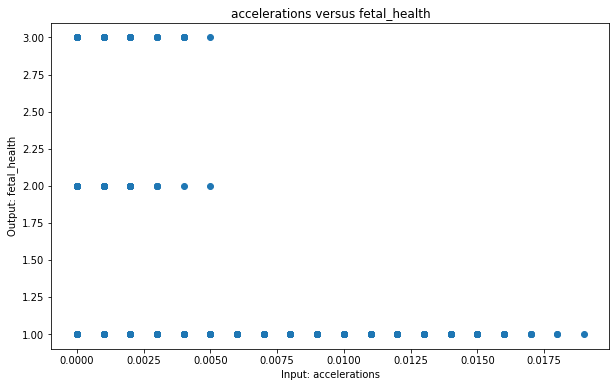

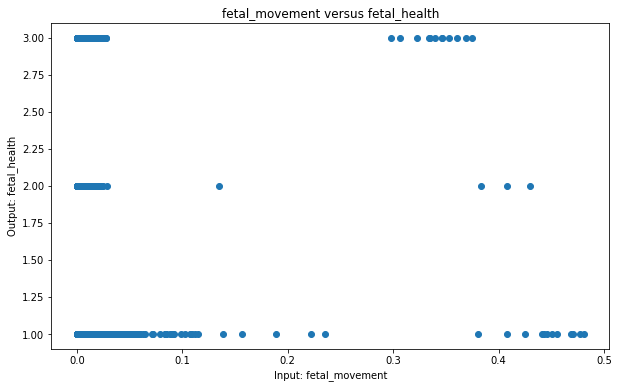

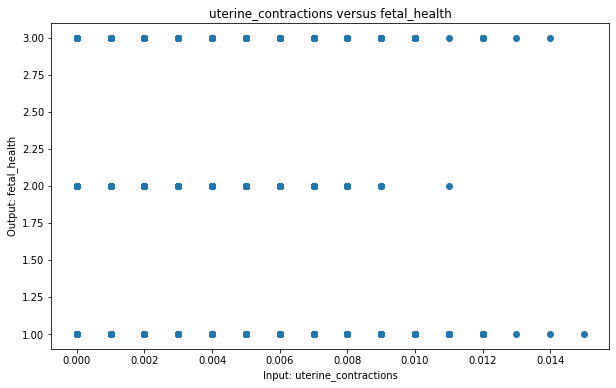

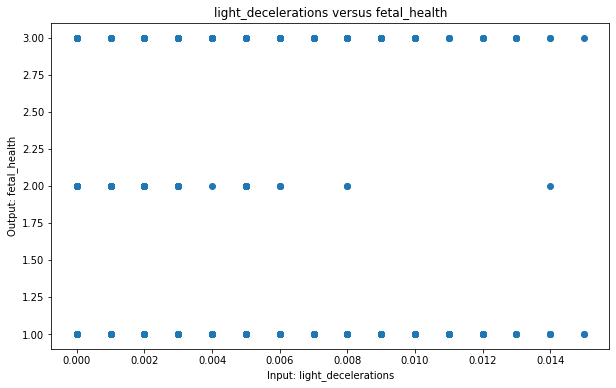

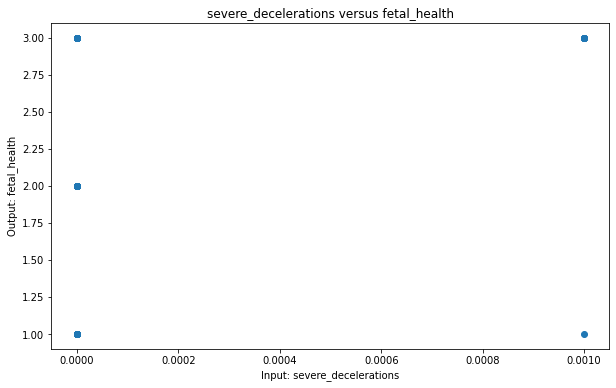

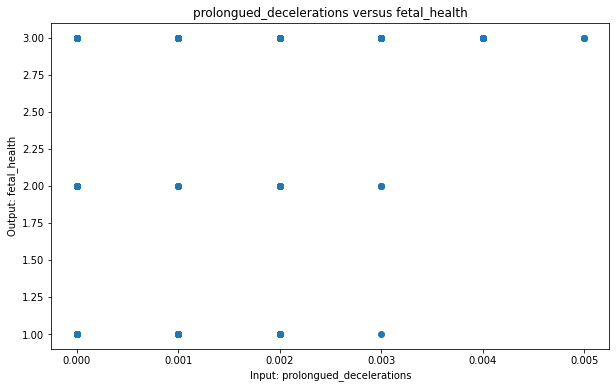

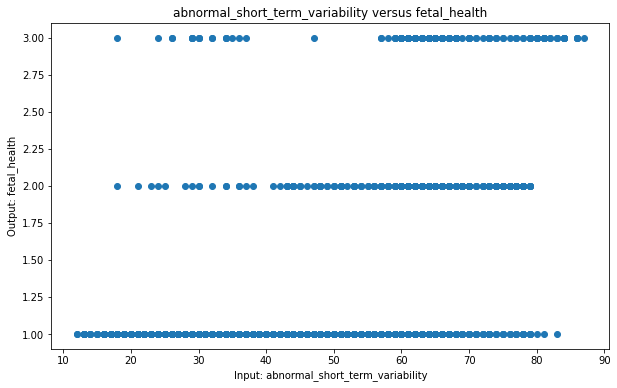

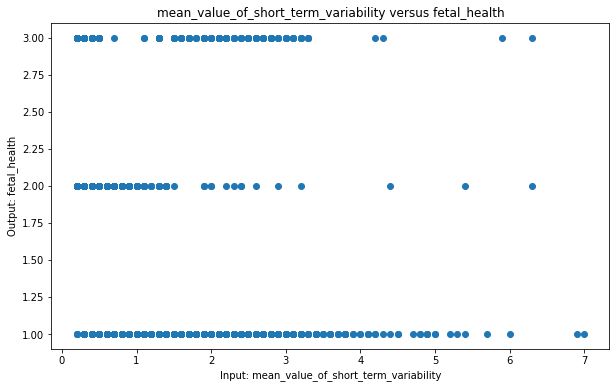

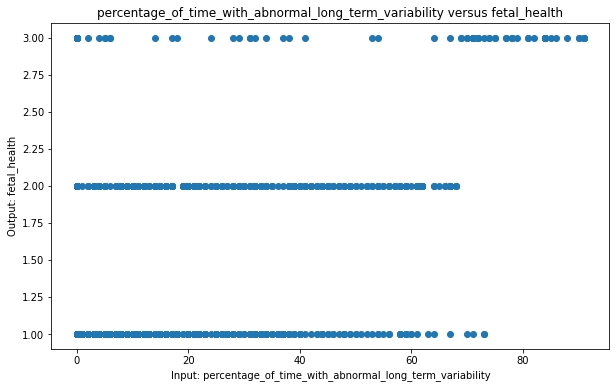

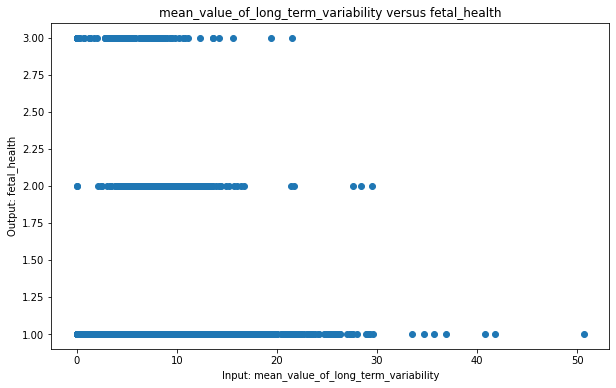

In [14]:
for feature in RELEVANT_INPUT_FEATURES:
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(x = df[feature], y = df[OUTPUT_COL])
    plt.xlabel("Input: " + feature)
    plt.ylabel("Output: " + OUTPUT_COL)
    plt.title(feature + " versus " + OUTPUT_COL)
    plt.show()

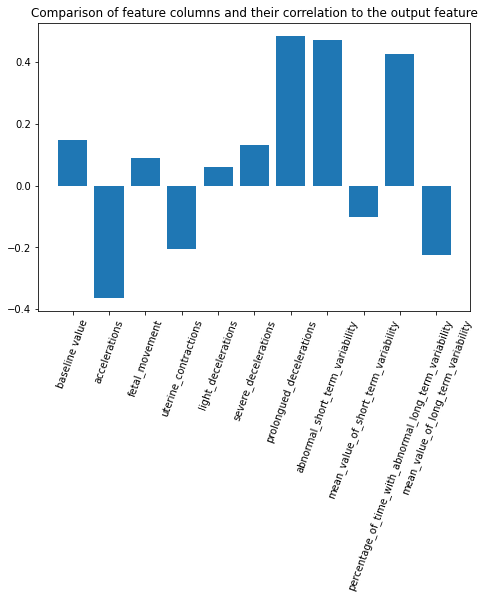

In [15]:
correlations = []
for feature in RELEVANT_INPUT_FEATURES:
    correlations.append(np.corrcoef(df[feature], df[OUTPUT_COL])[0][1])
    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(RELEVANT_INPUT_FEATURES,correlations)
plt.title("Comparison of feature columns and their correlation to the output feature")
plt.xticks(rotation=70)
plt.show()